Nama : Muhammad Nur Ishlaahudin Sya'bani

# Import Library

In [1]:
#Import libraries yang digunakan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#Setting default style untuk visual
sns.set(style="whitegrid")

# Import Dataset

In [2]:
#Load semua dataset
tourism = pd.read_csv('tourism_with_id.csv')
user = pd.read_csv('user.csv')
rating = pd.read_csv('tourism_rating.csv')
package = pd.read_csv('package_tourism.csv')

# Data Preprocessing

Setiap dataset akan dibersihkan sendiri-sendiri sebelum digabungkan menjadi satu dataset yang besar.

## Data Tourism

Melihat isi dari data tourism

In [3]:
#Melihat isi dari data tourism
tourism

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,45.0,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906,NaN,433
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,NaN,434
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938,NaN,435
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,NaN,436


In [4]:
#Melihat info dari data tourism
tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [5]:
#Mengecek apakah ada nilai null atau NaN pada data tourism
tourism.isnull().sum()

,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,232
Coordinate,0
Lat,0


In [6]:
#Menghapus data yang tidak digunakan pada data tourism
tourism.drop(['Unnamed: 11', 'Unnamed: 12'], axis=1, inplace=True)

In [7]:
#Mengisi nilai null atau NaN dengan 0.0 , karena jika dihapus akan merubah isi data yang ada
tourism.fillna(0.0, inplace=True)

In [8]:
#Mengecek data yang bernilai null atau NaN masih ada atau tidak
tourism.isnull().sum()

,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,0
Coordinate,0
Lat,0


In [9]:
#Melihat statistik deskriptif untuk kolom numerik
tourism.describe()

,Place_Id,Price,Rating,Time_Minutes,Lat,Long
count,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,219.000000,24652.173913,4.442792,38.752860,-7.095438,109.160142
std,126.295289,66446.374709,0.208587,54.876745,0.727241,1.962848
min,1.000000,0.000000,3.400000,0.000000,-8.197894,103.931398
25%,110.000000,0.000000,4.300000,0.000000,-7.749590,107.578369
50%,219.000000,5000.000000,4.500000,0.000000,-7.020524,110.237468
75%,328.000000,20000.000000,4.600000,60.000000,-6.829411,110.431869
max,437.000000,900000.000000,5.000000,360.000000,1.078880,112.821662


## Data User

In [10]:
#Melihat isi dari data user
user

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20
...,...,...,...
295,296,"Lampung, Sumatera Selatan",31
296,297,"Palembang, Sumatera Selatan",39
297,298,"Bogor, Jawa Barat",38
298,299,"Sragen, Jawa Tengah",27


In [11]:
#Melihat info dari data user
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [12]:
#Mengecek apakah ada nilai null atau NaN pada data user
user.isnull().sum()

,0
User_Id,0
Location,0
Age,0


In [13]:
#Melihat statistik deskriptif untuk kolom numerik
user.describe()

,User_Id,Age
count,300.000000,300.000000
mean,150.500000,28.700000
std,86.746758,6.393716
min,1.000000,18.000000
25%,75.750000,24.000000
50%,150.500000,29.000000
75%,225.250000,34.000000
max,300.000000,40.000000


## Data Rating

In [14]:
#Melihat isi dari data rating
rating

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [15]:
#Melihat info dari data rating
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [16]:
#Mengecek apakah ada nilai null atau NaN pada data rating
rating.isnull().sum()

,0
User_Id,0
Place_Id,0
Place_Ratings,0


In [17]:
#Melihat statistik deskriptif untuk kolom numerik
rating.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


## Data Package

In [18]:
#Melihat isi dari data package
package

,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5
0,1,Jakarta,Pasar Tanah Abang,Taman Ayodya,Museum Tekstil,NaN,NaN
1,2,Jakarta,Pasar Tanah Abang,Pasar Taman Puring,Pasar Petak Sembilan,NaN,NaN
2,3,Jakarta,Perpustakaan Nasional,Monas,Masjid Istiqlal,NaN,NaN
3,4,Jakarta,Pulau Tidung,Pulau Bidadari,Pulau Pari,Pulau Pramuka,Pulau Pelangi
4,5,Jakarta,Museum Satria Mandala,Museum Wayang,Museum Bahari Jakarta,Museum Macan (Modern and Contemporary Art in N...,NaN
...,...,...,...,...,...,...,...
95,96,Surabaya,Ekowisata Mangrove Wonorejo,Taman Harmoni Keputih,Taman Kunang-Kunang,Taman Ekspresi Dan Perpustakaan,Museum De Javasche Bank
96,97,Surabaya,Ciputra Waterpark,Kenjeran Park,Kebun Binatang Surabaya,Food Junction Grand Pakuwon,| Atlantis Land Surabaya
97,98,Surabaya,Museum Kesehatan Dr. Adhyatma,Patung Buddha Empat Rupa,Taman Hiburan Rakyat,Taman Bungkul,Taman Flora Bratang Surabaya
98,99,Surabaya,Taman Ekspresi Dan Perpustakaan,Museum De Javasche Bank,Surabaya Museum (Gedung Siola),Museum Mpu Tantular,Taman Air Mancur Menari Kenjeran


In [19]:
#Melihat info dari data package
package.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Package         100 non-null    int64 
 1   City            100 non-null    object
 2   Place_Tourism1  100 non-null    object
 3   Place_Tourism2  100 non-null    object
 4   Place_Tourism3  100 non-null    object
 5   Place_Tourism4  66 non-null     object
 6   Place_Tourism5  39 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [20]:
#Mengecek apakah ada nilai null atau NaN pada data package
package.isnull().sum()

,0
Package,0
City,0
Place_Tourism1,0
Place_Tourism2,0
Place_Tourism3,0
Place_Tourism4,34
Place_Tourism5,61


In [21]:
#Mengisi nilai null pada Place_Tourism4 dan Place_Tourism5 dengan nilai Tidak diketahui
package['Place_Tourism4'].fillna('Tidak diketahui', inplace=True)
package['Place_Tourism5'].fillna('Tidak diketahui', inplace=True)

<ipython-input-21-8a5ecfc5578e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  package['Place_Tourism4'].fillna('Tidak diketahui', inplace=True)
<ipython-input-21-8a5ecfc5578e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [22]:
#Mengecek apakah masih ada nilai null atau NaN
package.isnull().sum()

,0
Package,0
City,0
Place_Tourism1,0
Place_Tourism2,0
Place_Tourism3,0
Place_Tourism4,0
Place_Tourism5,0


In [23]:
#Melihat statistik deskriptif untuk kolom numerik
package.describe()

,Package
count,100.000000
mean,50.500000
std,29.011492
min,1.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


# Merging Dataset

In [24]:
#Menggabungkan user dengan rating
user_rating = pd.merge(user, rating, on='User_Id', how='left')

In [25]:
#Menggabungkan hasilnya dengan info tempat wisata
tourism_user_rating = pd.merge(user_rating, tourism, on='Place_Id', how='left')

#Melihat hasil
tourism_user_rating

,User_Id,Location,Age,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,"Semarang, Jawa Tengah",20,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416
1,1,"Semarang, Jawa Tengah",20,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Bahari,Semarang,3000,4.1,0.0,"{'lat': -6.948877, 'lng': 110.3893285}",-6.948877,110.389329
2,1,"Semarang, Jawa Tengah",20,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134
3,1,"Semarang, Jawa Tengah",20,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Budaya,Semarang,10000,4.5,60.0,"{'lat': -7.264598899999997, 'lng': 110.4046017}",-7.264599,110.404602
4,1,"Semarang, Jawa Tengah",20,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Budaya,Yogyakarta,0,4.0,0.0,"{'lat': -7.792189999999999, 'lng': 110.362151}",-7.792190,110.362151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,300,"Ponorogo, Jawa Timur",26,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Taman Hiburan,Surabaya,35000,4.1,0.0,"{'lat': -7.247796300000002, 'lng': 112.7998235}",-7.247796,112.799824
9996,300,"Ponorogo, Jawa Timur",26,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Budaya,Jakarta,2000,4.7,45.0,"{'lat': -6.204630300000001, 'lng': 106.8365324}",-6.204630,106.836532
9997,300,"Ponorogo, Jawa Timur",26,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Cagar Alam,Bandung,25000,4.3,150.0,"{'lat': -6.829411199999999, 'lng': 107.6874666}",-6.829411,107.687467
9998,300,"Ponorogo, Jawa Timur",26,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Tempat Ibadah,Bandung,0,4.8,0.0,"{'lat': -6.925963500000001, 'lng': 107.6354278}",-6.925963,107.635428


In [26]:
data_surabaya = tourism_user_rating[tourism_user_rating['City'] == 'Surabaya']
data_surabaya

,User_Id,Location,Age,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
9,1,"Semarang, Jawa Tengah",20,393,5,Taman Harmoni Keputih,Tempat tersebut ialah Taman Hatmoni Keputih Su...,Cagar Alam,Surabaya,0,4.4,60.0,"{'lat': -7.2952211, 'lng': 112.8035603}",-7.295221,112.803560
13,1,"Semarang, Jawa Tengah",20,405,5,Surabaya North Quay,Surabaya menjadi kota besar yang sering menjad...,Taman Hiburan,Surabaya,50000,4.4,0.0,"{'lat': -7.1968193, 'lng': 112.7324578}",-7.196819,112.732458
20,1,"Semarang, Jawa Tengah",20,428,3,Monumen Bambu Runcing Surabaya,Monumen Bambu Runcing adalah ikon pariwisata S...,Budaya,Surabaya,0,4.6,15.0,"{'lat': -7.267775500000001, 'lng': 112.7443898}",-7.267775,112.744390
40,2,"Bekasi, Jawa Barat",21,413,3,Museum TNI AL Loka Jala Crana,Museum Loka Jala Crana berdiri pada tanggal 19...,Budaya,Surabaya,2000,4.5,0.0,"{'lat': -7.227185, 'lng': 112.718997}",-7.227185,112.718997
42,2,"Bekasi, Jawa Barat",21,437,5,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya,10000,4.8,0.0,"{'lat': -7.2420758, 'lng': 112.7368158}",-7.242076,112.736816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9972,299,"Sragen, Jawa Tengah",27,407,5,Taman Ekspresi Dan Perpustakaan,Taman Ekspresi Surabaya tidak hanya menyuguhka...,Taman Hiburan,Surabaya,0,4.5,45.0,"{'lat': -7.2573072, 'lng': 112.7437199}",-7.257307,112.743720
9974,300,"Ponorogo, Jawa Timur",26,397,2,Taman Kunang-Kunang,Taman Kunang – Kunang di Surabaya ini mempunya...,Taman Hiburan,Surabaya,0,4.4,45.0,"{'lat': -7.318220199999999, 'lng': 112.7842405}",-7.318220,112.784240
9988,300,"Ponorogo, Jawa Timur",26,435,4,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938
9992,300,"Ponorogo, Jawa Timur",26,416,4,Keraton Surabaya,Kawasan yang berjuluk Kampung Keraton ini terd...,Budaya,Surabaya,0,4.4,0.0,"{'lat': -7.256755299999998, 'lng': 112.7942203}",-7.256755,112.794220


In [27]:
#Menyimpan data yang sudah diolah
data_surabaya.to_csv('data_surabaya.csv', index=False)

# Exploratori Data Analysis

## Jumlah Pengunjung Berdasarkan Usia

In [28]:
#Menghitung jumlah kunjungan
visitor_by_age = data_surabaya.groupby('Age')['User_Id'].count().reset_index(name='jumlah_kunjungan')

#Mengurutkan berdasarkan usia
visitor_by_age = visitor_by_age.sort_values(by='Age')

#Menampilkan hasilnya
print(visitor_by_age)

    Age  jumlah_kunjungan
0    18                53
1    19                43
2    20                49
3    21                48
4    22                20
5    23                39
6    24                48
7    25                45
8    26                34
9    27                62
10   28                58
11   29                67
12   30                76
13   31                48
14   32                59
15   33                36
16   34                43
17   35                34
18   36                17
19   37                42
20   38                61
21   39                43
22   40                25


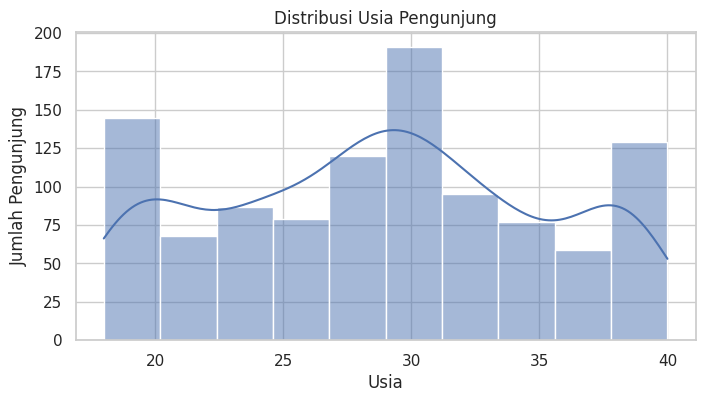

In [29]:
#Visualisasi jumlah pengunjung berdasarkan usia
plt.figure(figsize=(8, 4))
sns.histplot(data_surabaya['Age'], bins=10, kde=True)
plt.title('Distribusi Usia Pengunjung')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pengunjung')
plt.show()

* Pengunjung paling banyak berasal dari kelompok usia 25-30
  tahun, dengan puncak di usia 30 tahun.
* Jumlah pengunjung menurun tajam setelah usia 30 tahun,
  menunjukkan bahwa kelompok usia di atas 30 tahun kurang dominan.
* Kelompok usia 20 tahun juga relatif rendah dibandingkan
  usia 25-30 tahun.
  



**Rekomendasi :**

1. Jika tujuannya adalah meningkatkan pengunjung, fokuslah
   pada strategi pemasaran atau layanan yang menarik bagi kelompok usia 25-30 tahun.
   * Menggunakan konten kreatif di media sosial seperti posting video pendek aktivitas seru di lokasi.
   * Melakukan kolaborasi dengan influencer lokal.
   * Menyediakan giveaway atau diskon khusus.
   * Menyediakan spot foto instagenik dengan tagar khusus.
2. Untuk usia di atas 30 tahun, mungkin diperlukan pendekatan berbeda untuk meningkatkan minat mereka.
   * Membuat paket keluarga seperti "Weekend Family Pass" (tiket masuk + aktivitas anak + makanan).
   * Memberikan diskon untuk grup lebih dari 10 orang (misalnya arisan kantor atau acara lainnya).
   * Memberikan fasilitas ramah keluarga seperti area bermain anak + lounge untuk orang tua.
   * Memberikan kartu member dengan cashback untuk pengunjung tetap.



## Jumlah Tempat Wisata yang Dikunjungi per Kategori

In [30]:
#Menghitung jumlah pengunjung per kategori
most_visited_places = data_surabaya.groupby(['Category'])['User_Id'].count().reset_index(name='Visit_Count')

#Mengurutkan dari yang paling banyak dikunjungi
most_visited_places = most_visited_places.sort_values(by='Visit_Count', ascending=False)

#Menampilkan tempat paling banyak dikunjungi
print("Kategori tempat wisata paling banyak dikunjungi")
print(most_visited_places.head(10))

Kategori tempat wisata paling banyak dikunjungi
             Category  Visit_Count
1              Budaya          408
4       Taman Hiburan          399
2          Cagar Alam          111
5       Tempat Ibadah           73
3  Pusat Perbelanjaan           33
0              Bahari           26


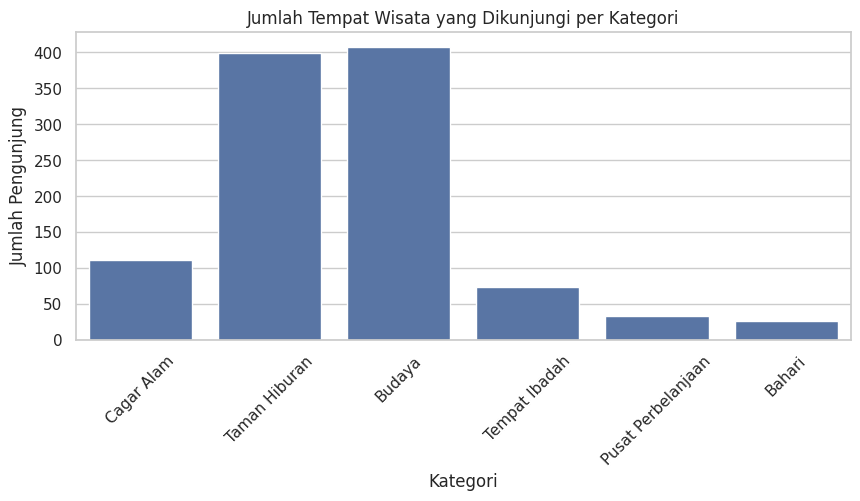

In [31]:
plt.figure(figsize=(10, 4))
sns.countplot(data=data_surabaya, x='Category')
plt.xticks(rotation=45)
plt.title('Jumlah Tempat Wisata yang Dikunjungi per Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Pengunjung')
plt.show()

* Kategori Budaya (408) memiliki dominasi tertinggi yang
  menunjukkan minat besar pada wisata sejarah, museum, atau seni tradisional.
* Kategori  Taman Hiburan (399)	memang hampir setara dengan
  Budaya yang mencerminkan preferensi masyarakat terhadap rekreasi modern.
* Kategori Cagar Alam (111) memiliki potensi alam yang
  signifikan, tetapi kunjungan masih rendah dibandingkan Budaya/Hiburan.
* Kategori Tempat Ibadah (73) yang mana wisata religi ada   peminat, tapi perlu pengembangan atraksi pendukung.
* Kategori Pusat Perbelanjaan (33) minim kunjungan yang
  mungkin karena bersifat umum/bukan destinasi utama.
* Kategori Bahari (26) adalah kategori wisata paling rendah
  dan perlu evaluasi aksesibilitas atau promosi wisata pantai/air.


**Rekomendasi :**

1. Kategori Unggulan (Budaya & Taman Hiburan):
   * Budaya:
      * Mengembangkan festival bulanan seperti pameran batik atau pertunjukan tari.
      * Menyediakan tur berpemandu dengan storytelling
      interaktif.
   * Taman Hiburan:
      * Kolaborasi dengan influencer untuk promo event spesial seperti konser atau Halloween Night).
      * Menawarkan paket keluarga seperti paket bundling tiket + makan + workshop anak.

2. Kategori Potensial (Cagar Alam & Bahari):
   * Cagar Alam:
      * Menambahkan fasilitas pendukung seperti jalur trekking, spot foto.
      * Melakukan promo paket weekend getaway dengan aktivitas camping atau bird watching.
   * Bahari:
      * Meningkatkan promosi wisata air seperti snorkeling atau kapal sunset di media sosial.
      * Menyediakan transportasi terjangkau ke lokasi seperti shuttle bus dari pusat kota.

3. Kategori Tertinggal (Tempat Ibadah & Pusat Perbelanjaan):
   * Tempat Ibadah:
      * Menggabungkan dengan wisata sejarah dan wisata religi seperi "Tur Masjid Kuno + Kuliner Lokal.
   * Pusat Perbelanjaan:
      * Mengadakan event temporer seperti bazar UMKM atau pameran seni untuk menarik pengunjung.

## Jumlah Pengunjung Per Kategori Berdasarkan Usia

<ipython-input-32-f75a27f7e1bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_surabaya['Age_Group'] = pd.cut(data_surabaya['Age'], bins=bins, labels=labels)
<ipython-input-32-f75a27f7e1bf>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data_surabaya.groupby(['Age_Group', 'Category']).size().reset_index(name='Visits')


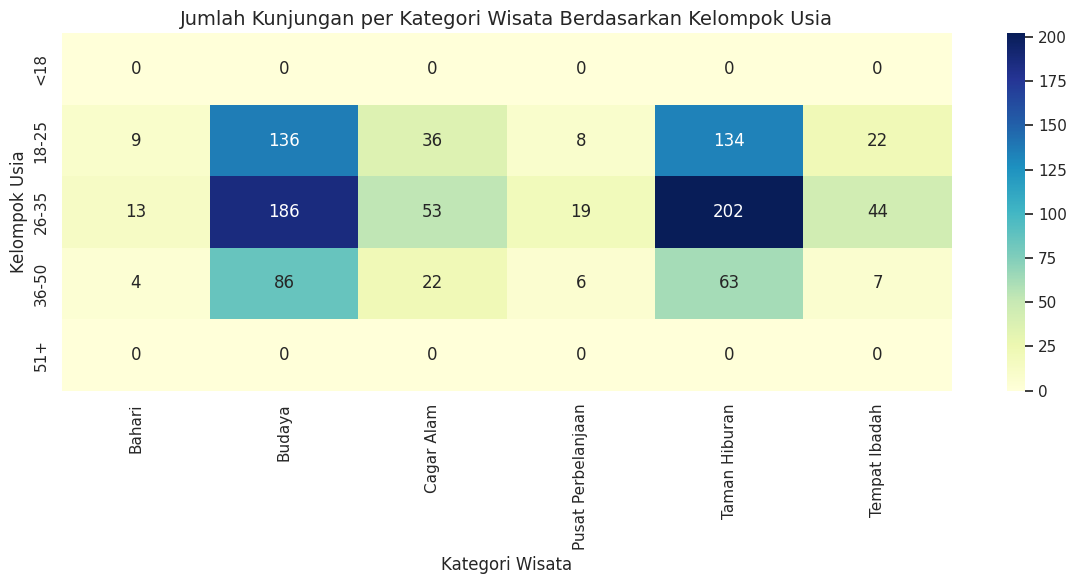

In [32]:
#Membuat kelompok usia
bins = [0, 17, 25, 35, 50, 100]   #Batasan usia
labels = ['<18', '18-25', '26-35', '36-50', '51+']    #Segmentadi usia
data_surabaya['Age_Group'] = pd.cut(data_surabaya['Age'], bins=bins, labels=labels)

#Menghitung jumlah kunjungan per kelompok usia dan kategori
grouped = data_surabaya.groupby(['Age_Group', 'Category']).size().reset_index(name='Visits')

#Visualisasi pivot untuk heatmap
pivot = grouped.pivot(index='Age_Group', columns='Category', values='Visits').fillna(0)

#Grafik visualisasi
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Jumlah Kunjungan per Kategori Wisata Berdasarkan Kelompok Usia', fontsize=14)
plt.xlabel('Kategori Wisata')
plt.ylabel('Kelompok Usia')
plt.tight_layout()
plt.show()

**Insight :**
1. Kelompok Usia 18–25
   * Taman Hiburan (134 kunjungan) dan Budaya (136 kunjungan) mendominasi preferensi.
   * Cagar Alam (36) juga cukup diminati.
   * Kategori lain (Pusat Perbelanjaan, Bahari, Tempat Ibadah) kurang populer.
2. Kelompok Usia 26–35
   * Jumlah kunjungan paling tinggi dibanding kelompok usia lain.
   * Taman Hiburan (202) adalah kategori paling populer.
   * Budaya (186) juga sangat diminati.
   * Cagar Alam (53) dan Tempat Ibadah (44) memiliki angka yang cukup signifikan.
   * Kategori Bahari dan Pusat Perbelanjaan juga lebih tinggi dibanding kelompok usia lainnya (masing-masing 13 dan 19).
3. Kelompok Usia 36–50
   * Penurunan signifikan dibanding kelompok usia 26–35.
   * Budaya (86) dan Taman Hiburan (63) tetap dominan.
   * Kunjungan ke Tempat Ibadah (7) masih ada, tetapi jauh lebih kecil.
4. Kelompok Usia <18 dan 51+
   * Tidak menunjukkan kunjungan sama sekali di semua kategori.
   * Kemungkinan data belum mencakup kelompok ini.
   * Bisa juga karena kelompok ini kurang terlibat dalam kegiatan wisata secara mandiri.

**Rekomendasi :**

* Promosi wisata budaya dan taman hiburan sebaiknya difokuskan ke usia 18–35 tahun.
* Ciptakan pengalaman wisata edukatif di kategori budaya yang bisa menjangkau usia 36–50 agar tetap relevan.
* Segmentasi pemasaran perlu difokuskan pada kelompok usia produktif (18–35), karena merekalah pendorong utama pariwisata.
* Jika memungkinkan, perluas data untuk menjangkau kelompok usia <18 dan 51+ agar strategi lebih inklusif.

## Rata-Rata Harga Tiket Tempat Wisata Per Kategori

In [33]:
#Memastikan kolom price dalam bentuk numerik
data_surabaya['Price'] = pd.to_numeric(data_surabaya['Price'], errors='coerce')

#Menghitung rata-rata harga tiket per kategori
avg_price_per_category = data_surabaya.groupby('Category')['Price'].mean().reset_index().sort_values('Price', ascending=False)

#Menampilkan kategori dengan harga rata-rata tertinggi
highest = avg_price_per_category.iloc[0]
print(f"Kategori dengan harga tiket rata-rata tertinggi: {highest['Category']} (Rp{highest['Price']:.2f})")

#Menampilkan kategori dengan harga rata-rata terendah
lowest = avg_price_per_category.iloc[-1]
print(f"Kategori dengan harga tiket rata-rata terendah: {lowest['Category']} (Rp{lowest['Price']:.2f})")

#Menampilkan semua kategori dan harga rata-ratanya
print("\n Rata-rata harga tiket per kategori:")
print(avg_price_per_category)

Kategori dengan harga tiket rata-rata tertinggi: Taman Hiburan (Rp23759.40)
Kategori dengan harga tiket rata-rata terendah: Pusat Perbelanjaan (Rp0.00)

 Rata-rata harga tiket per kategori:
             Category         Price
4       Taman Hiburan  23759.398496
0              Bahari  15000.000000
5       Tempat Ibadah   5205.479452
2          Cagar Alam   2972.972973
1              Budaya   2676.470588
3  Pusat Perbelanjaan      0.000000


<ipython-input-33-355f5cedd764>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_surabaya['Price'] = pd.to_numeric(data_surabaya['Price'], errors='coerce')


<ipython-input-34-030faa0cd3e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_per_category, x='Price', y='Category', palette='viridis')


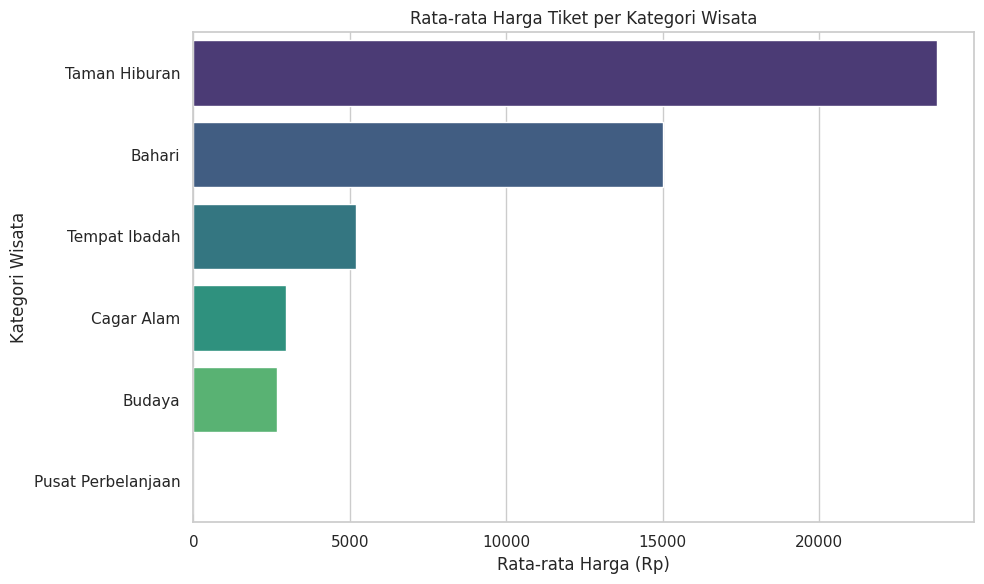

In [34]:
#Visualisasi rata-rata harga tiket per kategori
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_per_category, x='Price', y='Category', palette='viridis')
plt.title('Rata-rata Harga Tiket per Kategori Wisata')
plt.xlabel('Rata-rata Harga (Rp)')
plt.ylabel('Kategori Wisata')
plt.tight_layout()
plt.show()

* Taman Hiburan:
  * Kemungkinan termahal (mendekati Rp 20.000).
  * Sesuai dengan fasilitas modern dan atraksi berbayar.
* Bahari & Cagar Alam:
  * Harga menengah (Rp 10.000–15.000).
  * Biasanya mencakup tiket masuk dasar atau pemanduan alam.
* Budaya & Tempat Ibadah:
  * Harga lebih rendah (Rp 5.000–10.000) atau gratis (Rp 0).
  * Sering kali bersifat donasi atau subsidi pemerintah.
* Pusat Perbelanjaan:
  * Kemungkinan gratis (Rp 0) karena bukan destinasi berbayar.

**Rekomendasi :**

1. Kategori dengan Harga Tinggi (Taman Hiburan):
   * Menawarkan paket keluarga atau diskon hari kerja.
   * Menyediakan free pass untuk anak di bawah 5 tahun.

2. Kategori dengan Harga Rendah (Budaya/Tempat Ibadah):
   * Mengembangkan tur premium dengan pemandu atau akses eksklusif.
   * Menambahkan merchandise seperti souvenir tradisional.

3. Kategori Menengah (Bahari/Cagar Alam):
   * Menyertakan alat snorkel atau peta trekking dalam harga tiket.

## Segmentasi Harga

In [35]:
print(data_surabaya['Price'].value_counts().sort_index())

Price
0         643
2000       51
5000       65
10000      85
15000      68
35000      58
50000      27
95000      21
125000     32
Name: count, dtype: int64


In [36]:
segmentation_price = data_surabaya

In [37]:
#Segmentasi price
segmentation_price.loc[(segmentation_price['Price']>=0) & (segmentation_price['Price']<=20000), 'price_range'] = 'Murah'
segmentation_price.loc[(segmentation_price['Price']>20000) & (segmentation_price['Price']<=50000), 'price_range'] = 'Sedang'
segmentation_price.loc[(segmentation_price['Price']> 50000), 'price_range'] = 'Mahal'
segmentation_price.sort_values(by="City", ascending=False)

<ipython-input-37-a015919f0fd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segmentation_price.loc[(segmentation_price['Price']>=0) & (segmentation_price['Price']<=20000), 'price_range'] = 'Murah'


,User_Id,Location,Age,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Age_Group,price_range
9,1,"Semarang, Jawa Tengah",20,393,5,Taman Harmoni Keputih,Tempat tersebut ialah Taman Hatmoni Keputih Su...,Cagar Alam,Surabaya,0,4.4,60.0,"{'lat': -7.2952211, 'lng': 112.8035603}",-7.295221,112.803560,18-25,Murah
6664,200,"Serang, Banten",34,405,5,Surabaya North Quay,Surabaya menjadi kota besar yang sering menjad...,Taman Hiburan,Surabaya,50000,4.4,0.0,"{'lat': -7.1968193, 'lng': 112.7324578}",-7.196819,112.732458,26-35,Sedang
6676,200,"Serang, Banten",34,401,3,Taman Keputran,"Ntah, mengapa nama taman ini disebut dengan ta...",Taman Hiburan,Surabaya,0,4.3,0.0,"{'lat': -7.2732153, 'lng': 112.744102}",-7.273215,112.744102,26-35,Murah
6677,200,"Serang, Banten",34,417,2,Klenteng Sanggar Agung,Kelenteng Sanggar Agung atau Klenteng Hong San...,Budaya,Surabaya,10000,4.5,0.0,"{'lat': -7.246944, 'lng': 112.802222}",-7.246944,112.802222,26-35,Murah
6694,201,"Bekasi, Jawa Barat",21,418,5,Museum Sepuluh Nopember Kota Surabaya,Museum Sepuluh November Surabaya adalah salah ...,Budaya,Surabaya,5000,4.7,0.0,"{'lat': -7.245436900000001, 'lng': 112.7378985}",-7.245437,112.737899,18-25,Murah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,106,"Ponorogo, Jawa Timur",32,432,4,Taman Mundu,Taman Mundu merupakan salah satu taman atau ru...,Taman Hiburan,Surabaya,0,4.4,30.0,"{'lat': -7.251604599999999, 'lng': 112.7545983}",-7.251605,112.754598,26-35,Murah
3496,107,"Sragen, Jawa Tengah",24,407,2,Taman Ekspresi Dan Perpustakaan,Taman Ekspresi Surabaya tidak hanya menyuguhka...,Taman Hiburan,Surabaya,0,4.5,45.0,"{'lat': -7.2573072, 'lng': 112.7437199}",-7.257307,112.743720,18-25,Murah
3502,107,"Sragen, Jawa Tengah",24,401,3,Taman Keputran,"Ntah, mengapa nama taman ini disebut dengan ta...",Taman Hiburan,Surabaya,0,4.3,0.0,"{'lat': -7.2732153, 'lng': 112.744102}",-7.273215,112.744102,18-25,Murah
3513,107,"Sragen, Jawa Tengah",24,407,4,Taman Ekspresi Dan Perpustakaan,Taman Ekspresi Surabaya tidak hanya menyuguhka...,Taman Hiburan,Surabaya,0,4.5,45.0,"{'lat': -7.2573072, 'lng': 112.7437199}",-7.257307,112.743720,18-25,Murah


In [38]:
trial=segmentation_price.groupby(['Category','price_range'])['User_Id'].nunique().reset_index()
trial

,Category,price_range,User_Id
0,Bahari,Murah,25
1,Budaya,Murah,227
2,Cagar Alam,Murah,93
3,Pusat Perbelanjaan,Murah,32
4,Taman Hiburan,Mahal,50
5,Taman Hiburan,Murah,179
6,Taman Hiburan,Sedang,71
7,Tempat Ibadah,Murah,62


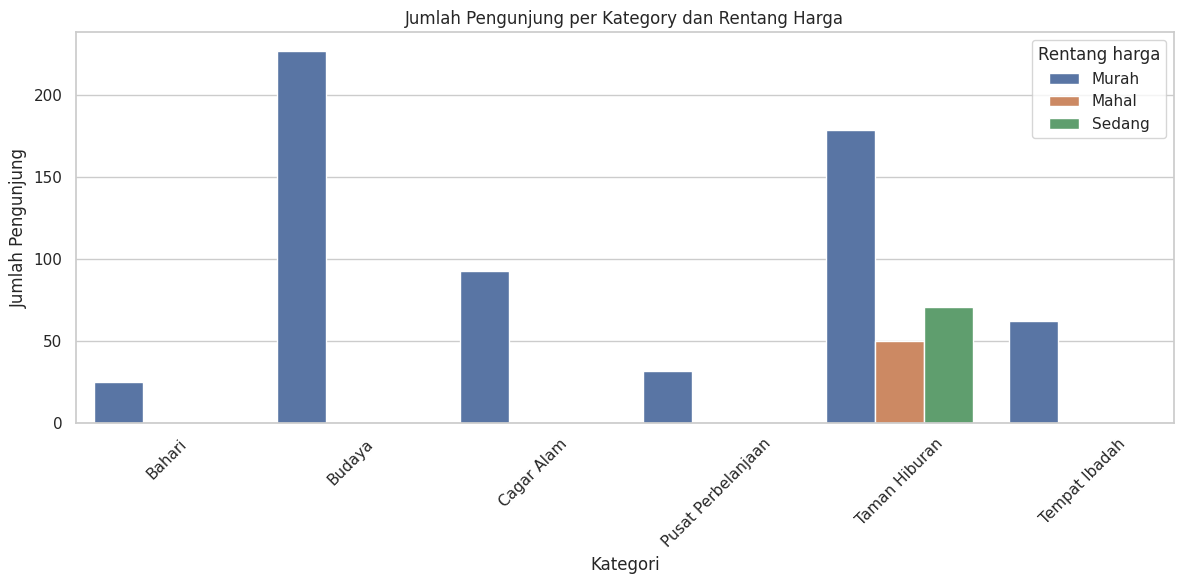

In [39]:
#Visualisasi segmentasi harga
plt.figure(figsize=(12,6))
sns.barplot(data=trial, x='Category', y='User_Id', hue='price_range')

plt.title('Jumlah Pengunjung per Kategory dan Rentang Harga')
plt.ylabel('Jumlah Pengunjung')
plt.xlabel('Kategori')
plt.legend(title='Rentang harga')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Distribusi Pengunjung per Kategori :**
  * Kategori Budaya (227) masih dominan dengan harga murah, menunjukkan minat tinggi pada wisata budaya yang terjangkau.
  * Kategori Taman Hiburan (300 (179+71+50)) yang paling populer meski memiliki variasi harga (Murah > Sedang > Mahal).
  * Kategori Cagar Alam (93) hanya tersedia harga murah, memiliki potensi untuk tambah layanan premium.
  * Kategori Tempat Ibadah (62) memiliki harga murah dan mungkin berbasis donasi.
  * Kategori Pusat Perbelanjaan (32) minim pengunjung, perlu event khusus.
  * Kategori Bahari (25) adalah paling rendah, perlu evaluasi akses atau promosi.

**Pengaruh Harga Terhadap Kunjungan :**
  * Murah (618 (25+227+93+32+179+62)) yang mencakup semua kategori	: 88.5% kunjungan, menunjukkan sensitivitas harga pengunjung.
  * Sedang	(71) yang hanya Taman Hiburan : dipilih sebagian kecil pengunjung.
  * Mahal (50) yang hanya Taman Hiburan : paling sedikit, mungkin untuk segmen khusus.
  * Harga murah mendominasi di semua kategori.
  * Taman Hiburan adalah satu-satunya kategori yang menawarkan tiga tingkat harga, dengan versi murah tetap paling diminati.


**Rekomendasi :**
1. Untuk Kategori Populer (Budaya & Taman Hiburan)
   * Budaya:
      * Menambahkan tur premium berbayar dengan pemandu ahli atau akses eksklusif.
      * Mengembangkan paket kombinasi seperti tiket museum + workshop seni.
   * Taman Hiburan:
      * Mempertahankan harga murah sebagai daya tarik utama.
      * Menyediakan upgrade onsite seperti fast pass dengan bayar tambahan.
2. Untuk Kategori Potensial (Cagar Alam & Bahari)
   * Cagar Alam:
      * Menambahkan aktivitas berbayar seperti penyewaan alat camping, fotografi wildlife.
   * Bahari:
      * Memberikan promo paket all-inclusive (transportasi + snorkeling + makan).
3. Untuk Kategori Tertinggal (Pusat Perbelanjaan & Tempat Ibadah)
   * Pusat Perbelanjaan:
      * Memanfaatkan sebagai venue event gratis seperti bazar atau pameran untuk menarik pengunjung.
   * Tempat Ibadah:
     * Mengembangkan wisata religi dengan storytelling sejarah.

## Rata-Rata Rating Per Kategori

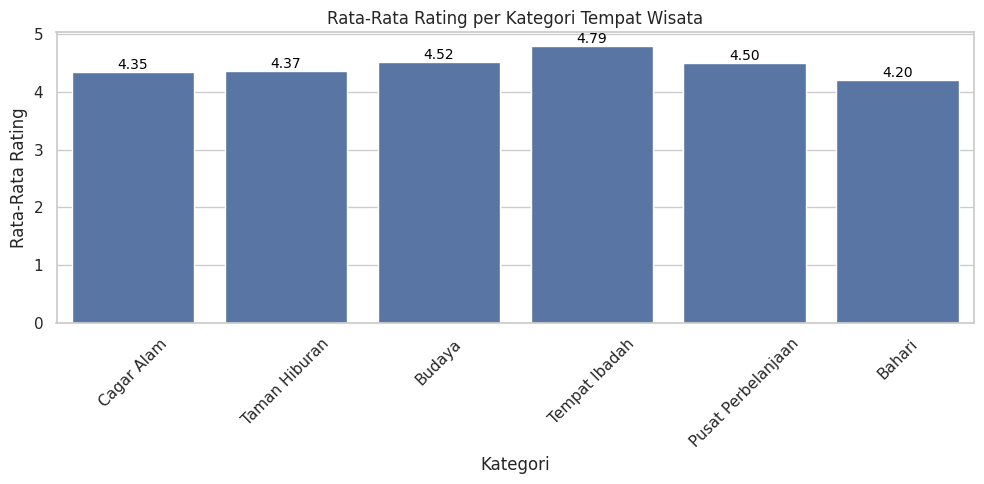

In [40]:
plt.figure(figsize=(10, 5))
#Membuat barplot
ax = sns.barplot(data=data_surabaya, x='Category', y='Rating', estimator='mean', errorbar=None)
plt.xticks(rotation=45)
plt.title('Rata-Rata Rating per Kategori Tempat Wisata')
plt.ylabel('Rata-Rata Rating')
plt.xlabel('Kategori')

#Menambahkan angka di atas bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',  # Format angka 2 desimal
                (p.get_x() + p.get_width() / 2, height),  # Posisi tengah bar
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

**Insight :**
* Kategori dengan Rating Tertinggi:
  * Tempat Ibadah memiliki rating tertinggi (4.79), menunjukkan bahwa pengunjung sangat puas dengan fasilitas dan pengalaman di tempat ibadah.
  * Hal ini bisa mencerminkan kenyamanan, kebersihan, ketenangan, atau pengelolaan yang baik pada tempat-tempat tersebut.
* Kategori Budaya dan Pusat Perbelanjaan juga enonjol:
  * Kategori Budaya (4.52) dan Pusat Perbelanjaan (4.50) juga mendapat nilai tinggi, menunjukkan bahwa wisata edukatif dan belanja menjadi daya tarik yang disukai.
  * Bisa jadi karena nilai historis, pengalaman interaktif, atau variasi produk dan kenyamanan saat berbelanja.
* Kategori dengan Rating Terendah:
  * Bahari (4.20) mendapatkan rating terendah, meskipun tetap tergolong tinggi secara umum.
  * Ini bisa menunjukkan adanya kekurangan pada fasilitas, kebersihan, atau aksesibilitas wisata bahari yang perlu diperbaiki.
* Distribusi Rating Merata dan Relatif Tinggi:
  * Semua kategori memiliki rating di atas 4.2, menunjukkan bahwa tingkat kepuasan pengunjung secara keseluruhan cukup tinggi di semua jenis wisata.



**Rekomendasi :**
* Prioritaskan peningkatan di kategori Bahari, terutama jika menjadi bagian penting dari strategi pariwisata daerah.
* Pertahankan kualitas di Tempat Ibadah dan Budaya, bisa dijadikan benchmark untuk kategori lain.
* Pertimbangkan juga promosi dan dukungan infrastruktur untuk kategori dengan potensi tinggi tetapi rating belum maksimal seperti Taman Hiburan dan Cagar Alam.

## Kolerasi Antar Fitur

In [41]:
data_surabaya.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1050 entries, 9 to 9995
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   User_Id        1050 non-null   int64   
 1   Location       1050 non-null   object  
 2   Age            1050 non-null   int64   
 3   Place_Id       1050 non-null   int64   
 4   Place_Ratings  1050 non-null   int64   
 5   Place_Name     1050 non-null   object  
 6   Description    1050 non-null   object  
 7   Category       1050 non-null   object  
 8   City           1050 non-null   object  
 9   Price          1050 non-null   int64   
 10  Rating         1050 non-null   float64 
 11  Time_Minutes   1050 non-null   float64 
 12  Coordinate     1050 non-null   object  
 13  Lat            1050 non-null   float64 
 14  Long           1050 non-null   float64 
 15  Age_Group      1050 non-null   category
 16  price_range    1050 non-null   object  
dtypes: category(1), float64(4), int64(5), 

In [42]:
#Menampilkan hanya kolom numerik
numerik_cols = data_surabaya.select_dtypes(include=['number']).columns
print(numerik_cols)

Index(['User_Id', 'Age', 'Place_Id', 'Place_Ratings', 'Price', 'Rating',
       'Time_Minutes', 'Lat', 'Long'],
      dtype='object')


In [43]:
kolerasi = data_surabaya

In [44]:
#Mengubah kolom yang bukan numerik menjadi numerik
kolerasi['price_range'] = pd.to_numeric(kolerasi['price_range'], errors='coerce')

<ipython-input-44-3b8e66aee999>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kolerasi['price_range'] = pd.to_numeric(kolerasi['price_range'], errors='coerce')


In [45]:
kolerasi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1050 entries, 9 to 9995
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   User_Id        1050 non-null   int64   
 1   Location       1050 non-null   object  
 2   Age            1050 non-null   int64   
 3   Place_Id       1050 non-null   int64   
 4   Place_Ratings  1050 non-null   int64   
 5   Place_Name     1050 non-null   object  
 6   Description    1050 non-null   object  
 7   Category       1050 non-null   object  
 8   City           1050 non-null   object  
 9   Price          1050 non-null   int64   
 10  Rating         1050 non-null   float64 
 11  Time_Minutes   1050 non-null   float64 
 12  Coordinate     1050 non-null   object  
 13  Lat            1050 non-null   float64 
 14  Long           1050 non-null   float64 
 15  Age_Group      1050 non-null   category
 16  price_range    0 non-null      float64 
dtypes: category(1), float64(5), int64(5), 

In [49]:
#Menghapus kolom price_range yang tidak digunakan
kolerasi.drop('price_range', axis=1, inplace=True)

<ipython-input-49-369305360384>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kolerasi.drop('price_range', axis=1, inplace=True)


In [50]:
#Mengetahui nilai dari matriks kolerasi
correlation_matrix = kolerasi.corr(numeric_only=True)
print(correlation_matrix)

                User_Id       Age  Place_Id  Place_Ratings     Price  \
User_Id        1.000000  0.067407  0.029621      -0.139230  0.007594   
Age            0.067407  1.000000 -0.004739      -0.039847  0.005836   
Place_Id       0.029621 -0.004739  1.000000       0.005092  0.094228   
Place_Ratings -0.139230 -0.039847  0.005092       1.000000 -0.014388   
Price          0.007594  0.005836  0.094228      -0.014388  1.000000   
Rating        -0.000311  0.005919  0.295260       0.012672 -0.229809   
Time_Minutes  -0.002738  0.013057 -0.198956      -0.044415  0.420015   
Lat            0.028260 -0.003967  0.047306      -0.010174  0.148734   
Long           0.022249  0.037336 -0.044172      -0.004636  0.017821   

                 Rating  Time_Minutes       Lat      Long  
User_Id       -0.000311     -0.002738  0.028260  0.022249  
Age            0.005919      0.013057 -0.003967  0.037336  
Place_Id       0.295260     -0.198956  0.047306 -0.044172  
Place_Ratings  0.012672     -0.044415 -

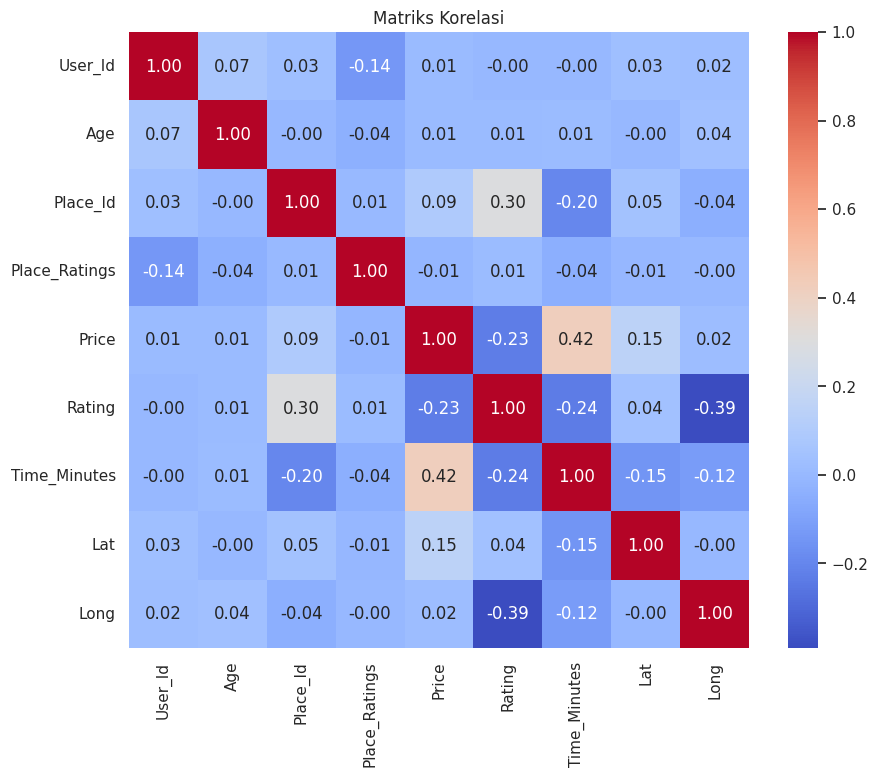

In [51]:
#Visualisasi matriks kolerasi
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

* Matriks korelasi di atas menunjukkan hubungan linear antara berbagai variabel. Nilai korelasi berkisar antara -1 hingga 1, di mana:
  * 1: Korelasi positif sempurna (kedua variabel bergerak searah).
  * -1: Korelasi negatif sempurna (kedua variabel bergerak berlawanan arah).
  * 0: Tidak ada korelasi linear.

**Poin-poin Penting:**
1. User_id:
   * Hampir tidak berkorelasi dengan variabel lain (nilai mendekati 0), kecuali sedikit korelasi negatif dengan Place_Ratings (-0.14). Ini menunjukkan bahwa ID pengguna tidak memengaruhi variabel lain secara signifikan.
2. Age (Usia):
   * Korelasi sangat lemah dengan semua variabel (nilai mendekati 0). Tidak ada hubungan yang signifikan antara usia dengan variabel lain dalam data ini.
3. Place_id:
   * Korelasi positif tertinggi dengan Rating (0.30), menunjukkan bahwa tempat tertentu cenderung memiliki rating yang lebih tinggi.
   * Korelasi negatif dengan Time_Minutes (-0.20), yang mungkin menunjukkan bahwa waktu kunjungan lebih singkat untuk tempat tertentu.
4. Place_Ratings:
   * Tidak berkorelasi kuat dengan variabel lain, kecuali sedikit korelasi negatif dengan User_id (-0.14). Hal ini menunjukkan bahwa rating tempat tidak terlalu dipengaruhi oleh variabel lain dalam data.
5. Price (Harga):
   * Korelasi positif kuat dengan Time_Minutes (0.42), menunjukkan bahwa tempat dengan harga lebih tinggi mungkin membutuhkan waktu kunjungan yang lebih lama.
   * Korelasi negatif dengan Rating (-0.23), yang mungkin mengindikasikan bahwa tempat dengan harga lebih tinggi cenderung mendapat rating lebih rendah.
6. Rating:
   * Korelasi negatif kuat dengan Long (-0.39), menunjukkan bahwa lokasi dengan bujur tertentu mungkin memiliki rating lebih rendah.
   * Korelasi negatif dengan Time_Minutes (-0.24), yang mungkin menunjukkan bahwa waktu kunjungan yang lebih lama berkaitan dengan rating yang lebih rendah.
7. Time_Minutes (Waktu Kunjungan):
   * Korelasi positif dengan Price (0.42), seperti yang telah dijelaskan.
   * Korelasi negatif dengan Place_id (-0.20) dan Rating (-0.24).
8. Lat (Lintang) dan Long (Bujur):
   * Lat memiliki korelasi positif lemah dengan Price (0.15).
   * Long memiliki korelasi negatif kuat dengan Rating (-0.39), menunjukkan bahwa lokasi di bujur tertentu mungkin memiliki rating lebih rendah.

**Rekomendasi :**
  * Jika tujuannya adalah memprediksi Rating, variabel seperti Place_id, Price, Time_Minutes, dan Long mungkin menjadi prediktor yang berguna.
  * Korelasi antara Price dan Time_Minutes bisa menjadi area menarik untuk analisis lebih lanjut, misalnya untuk memahami apakah harga yang lebih tinggi menyebabkan waktu kunjungan yang lebih lama atau sebaliknya.